# importing required packages

- import numpy for linear algebra
- import pandas for loading the dataset, data processing
- import matplotlib and seaborn for visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib
# import scipy as sp
# from subprocess import check_output # #print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
import boto3
import s3fs

In [3]:
import os

# Load the datasets

- to read the file from AWS

In [4]:
client = boto3.client('s3')

In [5]:
path = 's3://nyc-taxi-system/Final_dataset.csv'

In [6]:
bulk_df = pd.read_csv(path)
bulk_df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
0,0,1.0,2020-01-07 21:38:40,2020-01-07 21:45:13,2.0,1.00,1.0,N,249,113,...,12.85,2.5,West Village,Manhattan,40.734186,-74.005580,Greenwich Village North,Manhattan,40.734299,-74.000573
1,1,2.0,2020-01-24 20:09:35,2020-01-24 20:52:36,1.0,3.99,1.0,N,144,142,...,35.76,2.5,Little Italy/NoLiTa,Manhattan,40.721006,-73.994702,Lincoln Square East,Manhattan,40.775707,-73.991420
2,2,2.0,2020-01-15 13:37:54,2020-01-15 13:40:47,1.0,0.43,1.0,N,238,238,...,9.49,2.5,Upper West Side North,Manhattan,40.781960,-73.981243,Upper West Side North,Manhattan,40.781960,-73.981243
3,3,2.0,2020-01-16 16:22:45,2020-01-16 16:28:19,1.0,0.60,1.0,N,164,137,...,10.80,2.5,Midtown South,Manhattan,40.749842,-73.984251,Kips Bay,Manhattan,40.739546,-73.977083
4,4,1.0,2020-01-01 14:11:40,2020-01-01 14:12:28,4.0,0.00,1.0,N,132,132,...,3.30,0.0,JFK Airport,Queens,40.642948,-73.779373,JFK Airport,Queens,40.642948,-73.779373
5,5,2.0,2020-01-22 23:33:47,2020-01-22 23:39:45,2.0,1.45,1.0,N,142,237,...,12.42,2.5,Lincoln Square East,Manhattan,40.775707,-73.991420,Upper East Side South,Manhattan,40.779468,-73.958265
6,6,1.0,2020-01-04 16:12:29,2020-01-04 16:31:23,2.0,3.90,1.0,N,90,239,...,23.30,2.5,Flatiron,Manhattan,40.741059,-73.989642,Upper West Side South,Manhattan,40.769244,-73.990767
7,7,1.0,2020-01-31 18:49:37,2020-01-31 19:03:00,1.0,2.90,1.0,N,230,236,...,15.80,2.5,Times Sq/Theatre District,Manhattan,40.758168,-73.985525,Upper East Side North,Manhattan,40.764873,-73.961511
8,8,2.0,2020-01-12 07:09:42,2020-01-12 07:14:05,2.0,1.19,1.0,N,263,140,...,11.16,2.5,Yorkville West,Manhattan,43.670470,-79.387252,Lenox Hill East,Manhattan,40.765177,-73.961595
9,9,2.0,2020-01-01 10:49:09,2020-01-01 10:52:21,1.0,0.77,1.0,N,42,42,...,5.30,0.0,Central Harlem North,Manhattan,40.799218,-73.954900,Central Harlem North,Manhattan,40.799218,-73.954900


- remove the first column which is index column saved in dataset from prior sampling process

In [7]:
bulk_df.shape

(1200911, 27)

In [8]:
bulk_df.drop(['Unnamed: 0'],axis=1,inplace=True)

### to take 10% of total dataset as a sample

In [9]:
df = bulk_df.sample(frac=0.2)

In [10]:
# df = bulk_df

In [11]:
df.shape

(240182, 26)

# Exploratory Data Analysis ( EDA )

### shape

- returns number of rows and columns

In [12]:
df.shape

(240182, 26)

- 95074 rows and 26 columns

### columns in dataset

- print the columns names

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

- printing first 5 records

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1.0,3.49,1.0,N,262,100,2.0,...,20.80,2.5,Yorkville East,Manhattan,40.783251,-73.944720,Garment District,Manhattan,40.753694,-73.990517
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1.0,8.47,1.0,N,249,42,1.0,...,37.56,2.5,West Village,Manhattan,40.734186,-74.005580,Central Harlem North,Manhattan,40.799218,-73.954900
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1.0,1.00,1.0,N,236,239,1.0,...,10.80,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Upper West Side South,Manhattan,40.769244,-73.990767
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3.0,6.96,1.0,N,262,88,1.0,...,30.24,2.5,Yorkville East,Manhattan,40.783251,-73.944720,Financial District South,Manhattan,40.706628,-74.003603
922603,2.0,2021-07-26 21:08:06,2021-07-26 21:20:26,1.0,2.87,1.0,N,164,263,1.0,...,16.83,2.5,Midtown South,Manhattan,40.749842,-73.984251,Yorkville West,Manhattan,43.670470,-79.387252


### Demographic information of Customer & Vendor

    1. 'VendorID' – code indicating the TPER ( Taxicab and Livery Passenger ENchancement Programs (TPEP ) provider that provided the record	
	2. 'tpep_pickup_datetime' – pick up date and time 
	3. 'tpep_dropoff_datetime' – drop off date and time
    4. 'passenger_count' – passenger count 
	5. 'trip_distance' – elapsed trip distance in miles reported by the taximeter 
	6. 'RatecodeID' – final rate code effect at the end of the trip
		1 – Standard Rate
		2 – JFK
		3 – Newark
		4 – Nassau
		5 – Negotiated fare
		6 – group ride
	7. 'store_and_fwd_flag' – flag indicated whether the trip record was held in vehicle
		Y – store and forward trip
		N – not a store and forward trip
    8. 'PULocationID' – TLC Taxi zone in which taximeter was engaged 
	9. 'DOLocationID' – TLC Taxi zone in whoch taximeter was disengaged 
	10. 'payment_type' – numeric code signifying the payment mode
		1 – credit card
		2 – cash
		3 – no charge
		4 – dispute
		5 – unknown
		6 – voided trip
 	11. 'fare_amount' – time and distance fare calculated by the meter 
	12. 'extra' – miscellaneous extras and surcharges.
		1. Rush charge – 0.5 USD
		2. Overnight charge – 1 USD
    13. 'mta_tax' – 0.50 MTA tax, automatically added 
	14. 'tip_amount' – tip amount. field is automatically populated for credit card tips., cash tips are not included. 
	15. 'tolls_amount' – total amount of all tolls paid in trip 
	16. 'improvement_surcharge' – 0.30 imporvement surcharge assessed trips at the flag drop.
        17. 'total_amount' – total amount charged to passengers. Does not include cash tips. 
	18. 'congestion_surcharge' – additional charge added to base charge during unusal events like strikes, bad winter, major port fires.
    19. zone_x - pick up zone
    20. borough_x - pick up borough
    21. PUlatitude - pick up latitude
    22. PUlongitude - pick up longitude
    23. zone_y - drop off zone
    24. borough_y - drop off borough
    25. DOlatitude - drop off latitude
    26. DOlongitude - drop off longitude

### info()

- it will tell you how many entries you have, the names of each column, the data type of each column, and how many non-null values you have in each column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240182 entries, 604038 to 130289
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               227744 non-null  float64
 1   tpep_pickup_datetime   240182 non-null  object 
 2   tpep_dropoff_datetime  240182 non-null  object 
 3   passenger_count        227744 non-null  float64
 4   trip_distance          240182 non-null  float64
 5   RatecodeID             227744 non-null  float64
 6   store_and_fwd_flag     227744 non-null  object 
 7   PULocationID           240182 non-null  int64  
 8   DOLocationID           240182 non-null  int64  
 9   payment_type           227744 non-null  float64
 10  fare_amount            240182 non-null  float64
 11  extra                  240182 non-null  float64
 12  mta_tax                240182 non-null  float64
 13  tip_amount             240182 non-null  float64
 14  tolls_amount           240182 n

### Descriptive Statistics

- Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. 
- The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. 
- Any missing value or NaN value is automatically skipped. 

In [16]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PU_latitude,PU_longitude,DO_latitude,DO_longitude
count,227744.000000,227744.000000,240182.000000,227744.000000,240182.000000,240182.000000,227744.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,237508.000000,237508.000000,237827.000000,237827.000000
mean,1.659877,1.444091,5.205975,1.045239,163.119884,160.007911,1.297101,12.866638,1.046125,0.492643,2.029812,0.320009,0.297376,18.503356,2.160067,40.833859,-74.111730,40.829317,-74.092071
std,0.473779,1.087590,495.635402,0.696241,67.417305,71.770402,0.496282,12.120874,1.245323,0.074763,2.748628,1.595549,0.038776,14.224074,0.879706,0.476193,0.875613,0.457873,0.832387
min,1.000000,0.000000,-21.360000,1.000000,1.000000,1.000000,1.000000,-285.000000,-4.500000,-0.500000,-3.990000,-6.550000,-0.300000,-288.300000,-2.500000,40.508475,-79.439392,40.508475,-79.439392
25%,1.000000,1.000000,1.000000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,40.739713,-73.991420,40.739546,-73.991360
50%,2.000000,1.000000,1.700000,1.000000,162.000000,161.000000,1.000000,9.000000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,40.759822,-73.984079,40.759822,-73.981243
75%,2.000000,1.000000,3.180000,1.000000,234.000000,234.000000,2.000000,14.500000,2.500000,0.500000,2.760000,0.000000,0.300000,20.300000,2.500000,40.775707,-73.961511,40.775707,-73.961511
max,4.000000,7.000000,180827.510000,99.000000,265.000000,265.000000,4.000000,780.000000,8.250000,0.500000,442.180000,122.000000,0.300000,780.300000,2.750000,44.810791,-72.515328,44.810791,-72.515328


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,227744.0,1.659877,0.473779,1.000000,1.000000,2.000000,2.000000,4.000000
passenger_count,227744.0,1.444091,1.087590,0.000000,1.000000,1.000000,1.000000,7.000000
trip_distance,240182.0,5.205975,495.635402,-21.360000,1.000000,1.700000,3.180000,180827.510000
RatecodeID,227744.0,1.045239,0.696241,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,240182.0,163.119884,67.417305,1.000000,114.000000,162.000000,234.000000,265.000000
DOLocationID,240182.0,160.007911,71.770402,1.000000,107.000000,161.000000,234.000000,265.000000
payment_type,227744.0,1.297101,0.496282,1.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,240182.0,12.866638,12.120874,-285.000000,6.500000,9.000000,14.500000,780.000000
extra,240182.0,1.046125,1.245323,-4.500000,0.000000,0.500000,2.500000,8.250000
mta_tax,240182.0,0.492643,0.074763,-0.500000,0.500000,0.500000,0.500000,0.500000


In [18]:
### Measures of Central Tendency

- mean of values of column

In [19]:
# df.mean()

- median of respective columns

In [20]:
# df.median()

- mode of values of columns

In [21]:
# df.mode()

### to check the null values

In [22]:
df.isnull().sum()

VendorID                 12438
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12438
trip_distance                0
RatecodeID               12438
store_and_fwd_flag       12438
PULocationID                 0
DOLocationID                 0
payment_type             12438
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2674
PU_borough                2674
PU_latitude               2674
PU_longitude              2674
DO_zone                   2355
DO_borough                2355
DO_latitude               2355
DO_longitude              2355
dtype: int64

### checking the missing values

In [23]:
df.isna().sum()

VendorID                 12438
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12438
trip_distance                0
RatecodeID               12438
store_and_fwd_flag       12438
PULocationID                 0
DOLocationID                 0
payment_type             12438
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2674
PU_borough                2674
PU_latitude               2674
PU_longitude              2674
DO_zone                   2355
DO_borough                2355
DO_latitude               2355
DO_longitude              2355
dtype: int64

### unique elements

In [24]:
df.nunique()

VendorID                      3
tpep_pickup_datetime     239430
tpep_dropoff_datetime    239445
passenger_count               8
trip_distance              2815
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                253
DOLocationID                260
payment_type                  4
fare_amount                4061
extra                        37
mta_tax                       4
tip_amount                 1663
tolls_amount                184
improvement_surcharge         3
total_amount               5920
congestion_surcharge          6
PU_zone                     249
PU_borough                    6
PU_latitude                 250
PU_longitude                250
DO_zone                     256
DO_borough                    6
DO_latitude                 257
DO_longitude                257
dtype: int64

#### Conclusion:


- there are 3 vendors active in NYC
- The fare_amount variable has negative value as minimum value which is unusual
- The passenger_count variable having 0 as minimum no of passengers and maximum as 9
- The pickup and dropoff zone's location_Id shouldn't be greter than 263

# Data Cleansing

#### analysis of records having null values

- finds the null values and gives statistical analysis of the number of values .

In [25]:
ndf=df.isnull()
ndf.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
count,240182,240182,240182,240182,240182,240182,240182,240182,240182,240182,...,240182,240182,240182,240182,240182,240182,240182,240182,240182,240182
unique,2,1,1,2,1,2,2,1,1,2,...,1,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,227744,240182,240182,227744,240182,227744,227744,240182,240182,227744,...,240182,240182,237508,237508,237508,237508,237827,237827,237827,237827


### cleansing the data

- count of null values

In [26]:
df.isna().sum()

VendorID                 12438
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12438
trip_distance                0
RatecodeID               12438
store_and_fwd_flag       12438
PULocationID                 0
DOLocationID                 0
payment_type             12438
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2674
PU_borough                2674
PU_latitude               2674
PU_longitude              2674
DO_zone                   2355
DO_borough                2355
DO_latitude               2355
DO_longitude              2355
dtype: int64

In [27]:
# df = df.replace('0', np.nan)

- drop the null values

In [28]:
df=df.dropna()

In [29]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PU_zone                  0
PU_borough               0
PU_latitude              0
PU_longitude             0
DO_zone                  0
DO_borough               0
DO_latitude              0
DO_longitude             0
dtype: int64

- statistical description after removing the null values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224837 entries, 604038 to 130289
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               224837 non-null  float64
 1   tpep_pickup_datetime   224837 non-null  object 
 2   tpep_dropoff_datetime  224837 non-null  object 
 3   passenger_count        224837 non-null  float64
 4   trip_distance          224837 non-null  float64
 5   RatecodeID             224837 non-null  float64
 6   store_and_fwd_flag     224837 non-null  object 
 7   PULocationID           224837 non-null  int64  
 8   DOLocationID           224837 non-null  int64  
 9   payment_type           224837 non-null  float64
 10  fare_amount            224837 non-null  float64
 11  extra                  224837 non-null  float64
 12  mta_tax                224837 non-null  float64
 13  tip_amount             224837 non-null  float64
 14  tolls_amount           224837 n

# Data Preprocessing

#### renaming the columns names

In [31]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

In [32]:
df = df.rename(columns={"PU_latitude":"pickup_latitude", "PU_longitude":"pickup_longitude", "DO_latitude":"dropoff_latitude", "DO_longitude":"dropoff_longitude", "tpep_pickup_datetime":"pickup_datetime", "tpep_dropoff_datetime":"dropoff_datetime"})
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,pickup_latitude,pickup_longitude,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1.0,3.49,1.0,N,262,100,2.0,...,20.80,2.5,Yorkville East,Manhattan,40.783251,-73.944720,Garment District,Manhattan,40.753694,-73.990517
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1.0,8.47,1.0,N,249,42,1.0,...,37.56,2.5,West Village,Manhattan,40.734186,-74.005580,Central Harlem North,Manhattan,40.799218,-73.954900
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1.0,1.00,1.0,N,236,239,1.0,...,10.80,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Upper West Side South,Manhattan,40.769244,-73.990767
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3.0,6.96,1.0,N,262,88,1.0,...,30.24,2.5,Yorkville East,Manhattan,40.783251,-73.944720,Financial District South,Manhattan,40.706628,-74.003603
922603,2.0,2021-07-26 21:08:06,2021-07-26 21:20:26,1.0,2.87,1.0,N,164,263,1.0,...,16.83,2.5,Midtown South,Manhattan,40.749842,-73.984251,Yorkville West,Manhattan,43.670470,-79.387252


#### remove the locations outside the New York City

- minimum and maximum latitude and longitude of NYC

In [33]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

-72.515328 -79.439392
44.8107911 40.50847483
-72.515328 -79.439392
44.8107911 40.50847483


- remove where pickup and drop location are same

In [34]:
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(13374, 26)


- shape of data frame 

In [35]:
df.shape

(211463, 26)

- boundary for new york latitude longitude...

In [36]:
boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

- count of locations outside the new york city

In [37]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

5814
6141
5551
6424


- removing the locations which are outside the boundaries

In [38]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(198606, 26)

### plotting the pickup latitude and pickup longitude

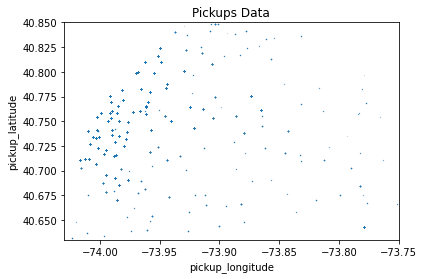

In [39]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### plot of dropoff latitude and dropoff longitude

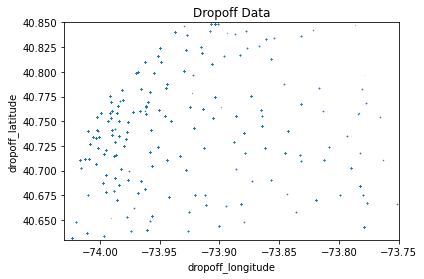

In [40]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### Passengers Count Data

- max and min count of passengers

In [41]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

6
0


In [42]:
df.passenger_count.value_counts()

1    147046
2     27462
3      7186
5      5781
0      4298
6      3860
4      2973
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='count', ylabel='passenger_count'>

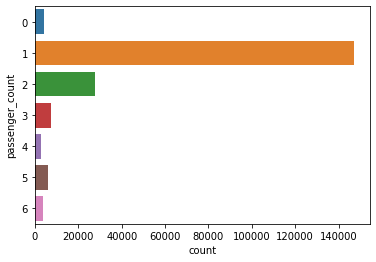

In [43]:
sns.countplot(y='passenger_count',data=df)

- removing records with passengers more than 6

In [44]:
df=df[~((df['passenger_count']>6))]
df.shape

(198606, 26)

- removing passengers with negative value as a count

In [45]:
df[df['fare_amount']<=0]['fare_amount'].count()
df=df[~(df['fare_amount']<=0)]
df.shape

(197958, 26)

# Feature Engineering

### checking the data types of the columns

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197958 entries, 604038 to 130289
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               197958 non-null  float64
 1   pickup_datetime        197958 non-null  object 
 2   dropoff_datetime       197958 non-null  object 
 3   passenger_count        197958 non-null  int32  
 4   trip_distance          197958 non-null  float64
 5   RatecodeID             197958 non-null  float64
 6   store_and_fwd_flag     197958 non-null  object 
 7   PULocationID           197958 non-null  int64  
 8   DOLocationID           197958 non-null  int64  
 9   payment_type           197958 non-null  float64
 10  fare_amount            197958 non-null  float64
 11  extra                  197958 non-null  float64
 12  mta_tax                197958 non-null  float64
 13  tip_amount             197958 non-null  float64
 14  tolls_amount           197958 n

- changing the data type from string to timestamp

In [47]:
type(df['pickup_datetime'].iloc[0])

str

In [48]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
type(df['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
type(df['dropoff_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### adding the new column for day of week, hour of day, month and year, trip duration

In [50]:
df['pickup_day']=df['pickup_datetime'].dt.dayofweek
df['dropoff_day']=df['dropoff_datetime'].dt.dayofweek

In [51]:
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

In [52]:
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

In [53]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [54]:
df['pickup_year']=df['pickup_datetime'].dt.year
df['dropoff_year']=df['dropoff_datetime'].dt.year

In [55]:
df['trip_duration'] = df.dropoff_datetime - df.pickup_datetime 
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,3,3,3,12,13,1,1,2021,2021,0 days 00:25:52
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,2,2,2,21,22,11,11,2019,2019,0 days 00:26:07
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,4,4,4,9,10,2,2,2021,2021,0 days 00:06:35
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,3,3,3,9,9,2,2,2020,2020,0 days 00:21:31
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,4,4,4,19,19,5,5,2020,2020,0 days 00:07:08


- pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
- pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
- pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
- pickup_month and dropoff_month with month number with January=1 and December=12.

- changing the data type of trip duration

In [56]:
type(df.trip_duration)

pandas.core.series.Series

In [57]:
df['trip_duration']=pd.to_timedelta(df['trip_duration'])

In [58]:
type(df.trip_duration.iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [59]:
for i in range(len(df)):
    
    df.trip_duration.iloc[i] = df.trip_duration.iloc[i].seconds

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,3,3,3,12,13,1,1,2021,2021,1552
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,2,2,2,21,22,11,11,2019,2019,1567
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,4,4,4,9,10,2,2,2021,2021,395
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,3,3,3,9,9,2,2,2020,2020,1291
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,4,4,4,19,19,5,5,2020,2020,428


### function to determine at what time of day ride was taken

In [61]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [62]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [63]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,3,12,13,1,1,2021,2021,1552,Afternoon,Afternoon
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,2,21,22,11,11,2019,2019,1567,Evening,Late night
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,4,9,10,2,2,2021,2021,395,Morning,Morning
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,3,9,9,2,2,2020,2020,1291,Morning,Morning
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,4,19,19,5,5,2020,2020,428,Evening,Evening


### mid night trip column

- 1 for YES
- 0 for NO
- Let's add the feature called mid night trip usually fare during night hours are high compare to day time
- The trip between night 11'o clock to morning 5'o clock are labelled mid night trip

In [64]:
df['mid_night_trip']=((df['pickup_timeofday']=='Late night')).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,12,13,1,1,2021,2021,1552,Afternoon,Afternoon,0
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,21,22,11,11,2019,2019,1567,Evening,Late night,0
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,9,10,2,2,2021,2021,395,Morning,Morning,0
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,9,9,2,2,2020,2020,1291,Morning,Morning,0
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,19,19,5,5,2020,2020,428,Evening,Evening,0


### 'Rush hour trip' column

- New York City has rush hour means heavy traffic from 4 PM to 8 PM
- So fare rates may differ from other %time

In [65]:
df['rush_hour_trip']=((df['pickup_timeofday']=='Evening')).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,13,1,1,2021,2021,1552,Afternoon,Afternoon,0,0
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,22,11,11,2019,2019,1567,Evening,Late night,0,1
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,10,2,2,2021,2021,395,Morning,Morning,0,0
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,9,2,2,2020,2020,1291,Morning,Morning,0,0
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,19,5,5,2020,2020,428,Evening,Evening,0,1


### Trips in snow season

- During snow season the taxi is very less available compare to other months i.e. taxi fare during snow season is high.
- NYC has the snow season from December to March but December and March has less snow compare to Jan and Feb
- So we will check if trip was in month of Jan and Feb it is during snow season

In [66]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,1,1,2021,2021,1552,Afternoon,Afternoon,0,0,1
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,11,11,2019,2019,1567,Evening,Late night,0,1,0
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,2,2,2021,2021,395,Morning,Morning,0,0,1
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,2,2,2020,2020,1291,Morning,Morning,0,0,1
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,5,5,2020,2020,428,Evening,Evening,0,1,0


### Distance calculator between pickup and drop coordinates

- Distance and the fare amount has the direct correlation if distance increase fare will be increase
- We will use python's geopy library to add column trip_distance which will have distance between two coordinates

###### using geopy library

In [67]:
from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).miles
    return dist

In [68]:
df['distance_lib']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season,distance_lib
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,1,2021,2021,1552,Afternoon,Afternoon,0,0,1,3.151520
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,11,2019,2019,1567,Evening,Late night,0,1,0,5.215979
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,2,2021,2021,395,Morning,Morning,0,0,1,1.564231
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,2,2020,2020,1291,Morning,Morning,0,0,1,6.124059
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,5,2020,2020,428,Evening,Evening,0,1,0,1.568971


###### using haverstine dsitance formula

In [69]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(row):
#     lon1, lat1, lon2, lat2):
    """
    Calculate the circle distance between two points in lat and lon
    on the earth (specified in decimal degrees)
    returning distance in miles
    """
    # need to convert decimal degrees to radians 
    # a unit of angle, equal to an angle at the center of a circle whose arc is equal in length to the radius.
    lon1, lat1, lon2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3965 # Radius of earth in kilometers (6371 for kms). Use 3956 for miles
    return c * r
#applying to the dataset
df['haversine_distance'] = df.apply(haversine_distance, axis=1)

In [70]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season,distance_lib,haversine_distance
604038,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.49,1.0,N,262,100,2.0,...,2021,2021,1552,Afternoon,Afternoon,0,0,1,3.151520,3.153559
1115757,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,8.47,1.0,N,249,42,1.0,...,2019,2019,1567,Evening,Late night,0,1,0,5.215979,5.225826
675273,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.00,1.0,N,236,239,1.0,...,2021,2021,395,Morning,Morning,0,0,1,1.564231,1.562935
67080,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.96,1.0,N,262,88,1.0,...,2020,2020,1291,Morning,Morning,0,0,1,6.124059,6.135762
206880,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.60,1.0,N,236,238,1.0,...,2020,2020,428,Evening,Evening,0,1,0,1.568971,1.570869


###### comparing both the calculated distances and getting it's mean as a value

In [71]:
df1 = df[['distance_lib', 'haversine_distance']]
df1.head()

,distance_lib,haversine_distance
604038,3.151520,3.153559
1115757,5.215979,5.225826
675273,1.564231,1.562935
67080,6.124059,6.135762
206880,1.568971,1.570869


In [72]:
df['trip_distance'] = (df['distance_lib']+df['haversine_distance'])/2
df['trip_distance'].head()

604038     3.152539
1115757    5.220902
675273     1.563583
67080      6.129910
206880     1.569920
Name: trip_distance, dtype: float64

In [73]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance'],
      dtype='object')

### Mapping

###### Convert specific pickup and drop Coordinates into location

- We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [74]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

###### number of pickup from the lcoation

In [75]:
def pickup_place(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (5156, 44)
Manhattan Pickup Total  (180280, 44)
Brroklyn Pickup Total  (967, 44)
Bronx Pickup Total  (3211, 44)
LaGuardia Pickup Total  (3991, 44)


###### number of dropoff from the location

In [76]:
def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Dropoff Total " , drop_place(JFK,df).shape)
print("Manhattan Dropoff Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Dropoff Total " , drop_place(Brooklyn,df).shape)
print("Bronx Dropoff Total " , drop_place(Bronx,df).shape)
print("LaGuardia Dropoff Total " , drop_place(LaGuardia,df).shape)

JFK Dropoff Total  (998, 44)
Manhattan Dropoff Total  (175118, 44)
Brroklyn Dropoff Total  (3417, 44)
Bronx Dropoff Total  (5741, 44)
LaGuardia Dropoff Total  (1286, 44)


###### function for pickup

In [77]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup_place(Area,data)
    d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

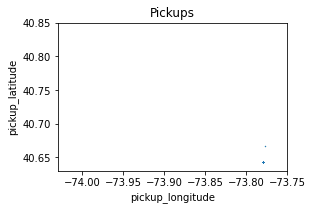

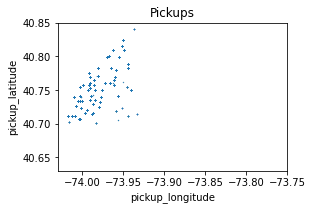

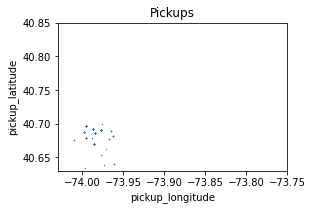

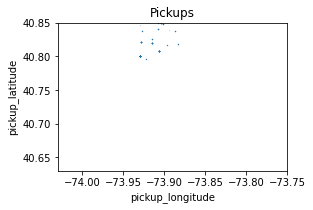

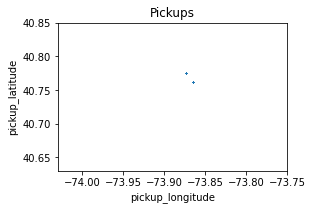

In [78]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

###### function for drop off from the boroughs

In [79]:
def plotDropAreaEachPlace(Area,data,ax):
    d=drop_place(Area,data)
    d.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

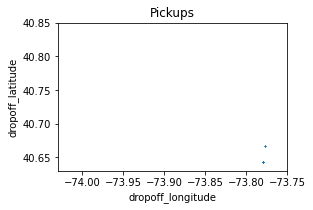

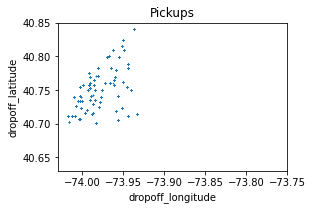

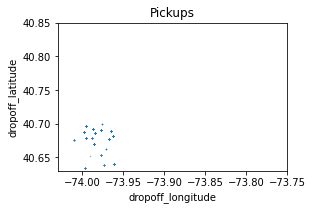

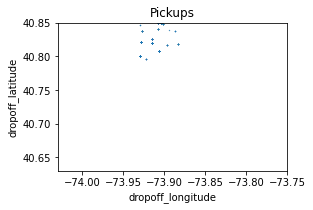

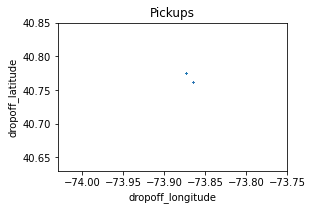

In [80]:
ax=plt.subplot(2,3,1)
plotDropAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotDropAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotDropAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotDropAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotDropAreaEachPlace(LaGuardia,df,ax)

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [81]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [82]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

In [83]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

Airport trip has the fixed rate so it is good to have a column which show whether trip is airport trip or not

In [84]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [85]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

Till here we have pre-processed our data and feature engineering done

# Save the pre-processed and feature_eng data in CSV file

In [86]:
from secrets import access_key, secret_access_key

In [87]:
client = boto3.client('s3',
                        aws_access_key_id = access_key,
                        aws_secret_access_key = secret_access_key)

In [88]:
df.to_csv("./feature_model.csv",index=False)

In [89]:
client.upload_file('./feature_model.csv', 'nyc-taxi-system', 'feature_model.csv')
print("Uploaded on AWS")
# os.remove('./feature_model.csv')
# print("File removed")

Uploaded on AWS


### Read Pre-processed file

In [90]:
path = 's3://nyc-taxi-system/feature_model.csv'

In [92]:
df=pd.read_csv(path)
df.shape

(197958, 55)

In [93]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_jfk,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia,isAirportTrip
0,2.0,2021-01-28 12:57:40,2021-01-28 13:23:32,1,3.152539,1.0,N,262,100,2.0,...,0,0,0,0,1,0,0,0,0,0
1,2.0,2019-11-06 21:50:10,2019-11-06 22:16:17,1,5.220902,1.0,N,249,42,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,2021-02-12 09:59:00,2021-02-12 10:05:35,1,1.563583,1.0,N,236,239,1.0,...,0,0,0,0,1,0,0,0,0,0
3,2.0,2020-02-13 09:36:46,2020-02-13 09:58:17,3,6.129910,1.0,N,262,88,1.0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,2020-05-22 19:47:32,2020-05-22 19:54:40,1,1.569920,1.0,N,236,238,1.0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia

### Univariate Analysis

### Target Variable

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

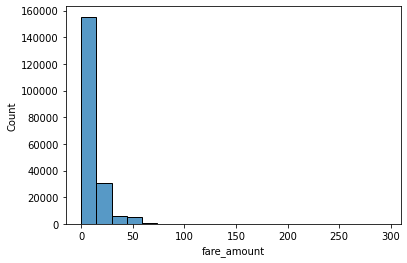

In [95]:
sns.histplot(df['fare_amount'],kde=False,bins=20)

- The histogram is really skewed as we can see.

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

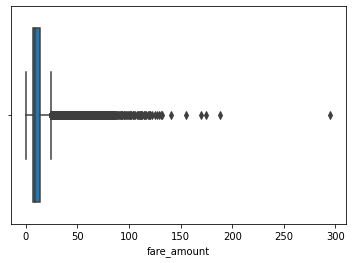

In [96]:
sns.boxplot(df['fare_amount'])

- not many outliers

In [97]:
df['fare_amount'].sort_values(ascending=False)

96877     295.00
89006     188.50
114692    174.50
25346     170.00
75051     155.50
           ...  
15276       0.01
134571      0.01
37252       0.01
103378      0.01
65957       0.01
Name: fare_amount, Length: 197958, dtype: float64

#### Vendor Id

<AxesSubplot:xlabel='VendorID', ylabel='count'>

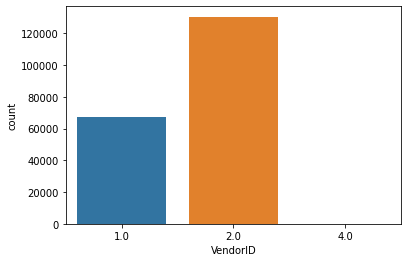

In [98]:
sns.countplot(x='VendorID',data=df)

- we can see there is significant difference between these two vendors trip vcount

#### Passenger Count

In [99]:
df.passenger_count.value_counts()

1    146524
2     27374
3      7168
5      5773
0      4298
6      3856
4      2965
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

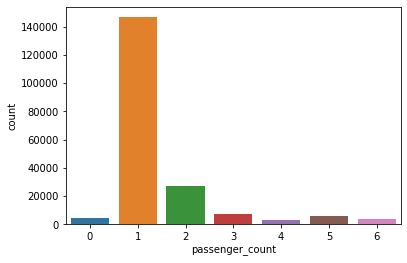

In [100]:
sns.countplot(x='passenger_count',data=df)

- the highest amount of trips are with 1 passenger.

#### Store and Forward Flag

In [101]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.989528
Y    0.010472
Name: store_and_fwd_flag, dtype: float64

- We see there are only 1% of trips that were stored before forwarding.

#### Distance

In [102]:
df['trip_distance'].value_counts()

1.022828     3030
1.010691     1412
0.447913     1300
0.329383     1203
0.699858     1095
             ... 
4.215010        1
3.673877        1
22.290378       1
12.864502       1
5.345705        1
Name: trip_distance, Length: 6944, dtype: int64

- The reasons for 0 km distance can be:
     - The dropoff location couldn’t be tracked.
     - The driver deliberately took this ride to complete a target ride number.
     - The passengers canceled the trip.

### Trips per day

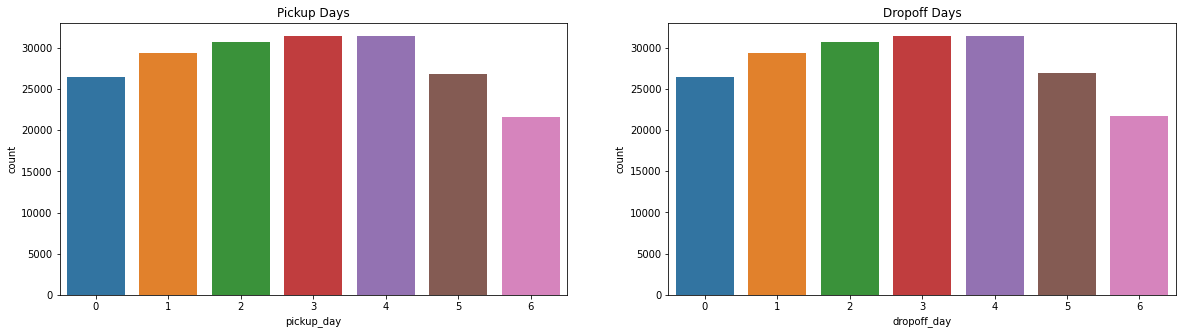

In [103]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

- We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

### trips per hour

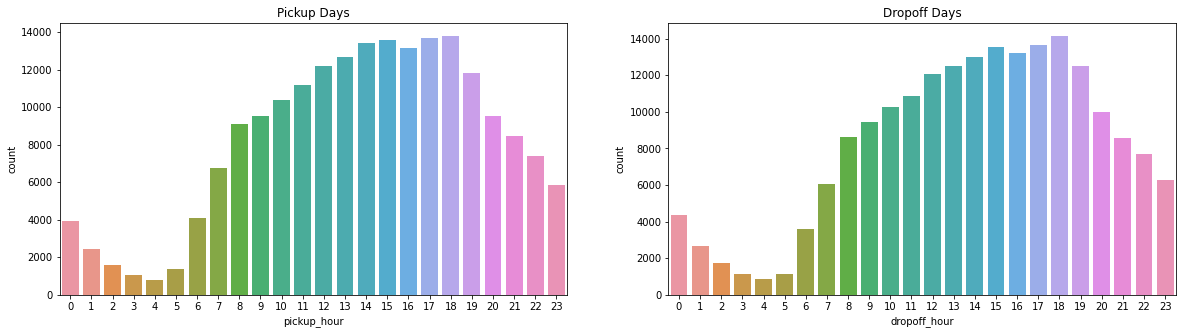

In [104]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

- We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

### Trips per Time of Day

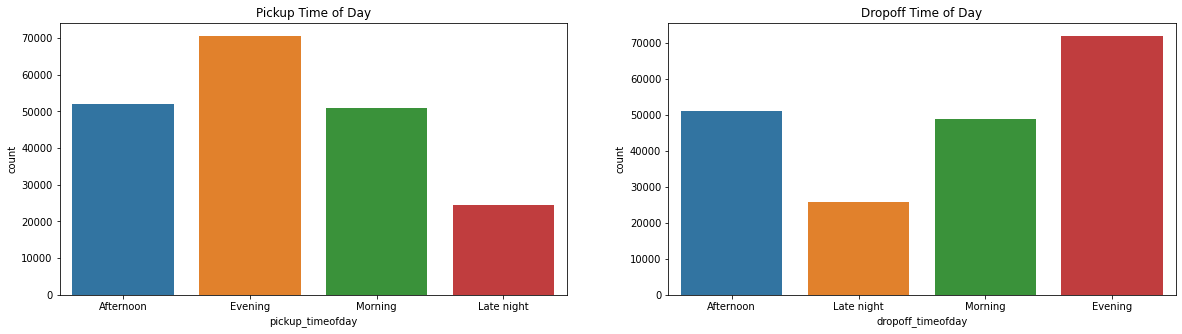

In [105]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

- As we saw above, evenings are the busiest.

### trips per month

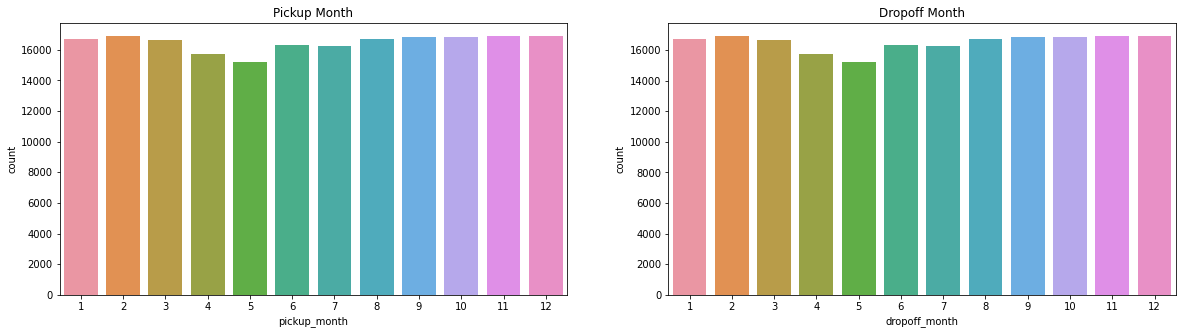

In [106]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

- There is not much difference in the number of trips across months.

### Bivariate Analysis

- Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.## 

### Trip Duration per Vendor

<AxesSubplot:xlabel='VendorID', ylabel='fare_amount'>

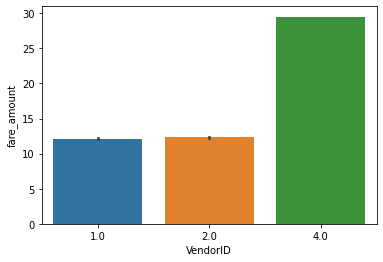

In [107]:
# sns.barplot(y='trip_duration',x='VendorID',data=df,estimator=np.mean)
sns.barplot(y='fare_amount',x='VendorID',data=df,estimator=np.mean)

- Vendor id 2 takes longer trips as compared to vendor 1.

### Trip Duration per Store and Forward Flag

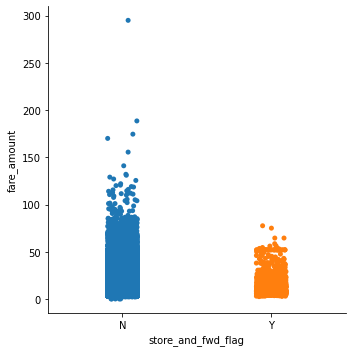

In [108]:
# sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind="strip")
sns.catplot(y='fare_amount',x='store_and_fwd_flag',data=df,kind="strip")

- Trip duration is generally longer for trips whose flag was not stored

### Trip Duration per passenger count

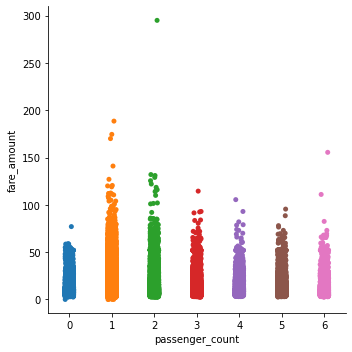

In [109]:
# sns.catplot(y='trip_duration',x='passenger_count',data=df,kind="strip")
sns.catplot(y='fare_amount',x='passenger_count',data=df,kind="strip")

- There is no visible relation between trip duration and passenger count.

### Trip Duration per hour

<AxesSubplot:xlabel='pickup_hour', ylabel='fare_amount'>

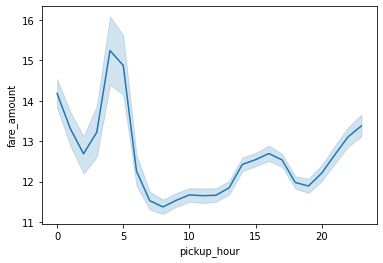

In [110]:
# sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
sns.lineplot(x='pickup_hour',y='fare_amount',data=df)

- We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.

- Trip duration is the lowest around 6 am as streets may not be busy.

### Trip duration per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='fare_amount'>

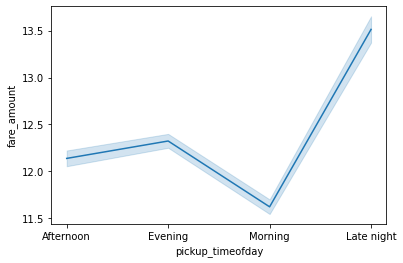

In [111]:
# sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)
sns.lineplot(x='pickup_timeofday',y='fare_amount',data=df)

- As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

### Trip duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='fare_amount'>

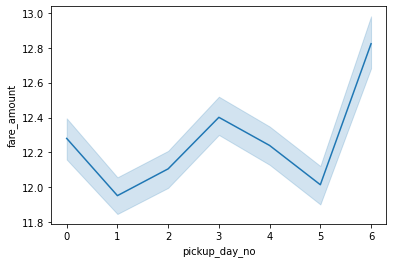

In [112]:
# sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)
sns.lineplot(x='pickup_day_no',y='fare_amount',data=df)

- Trip duration is the longest on Thursdays closely followed by Fridays

### Trip duration per month

<AxesSubplot:xlabel='pickup_month', ylabel='fare_amount'>

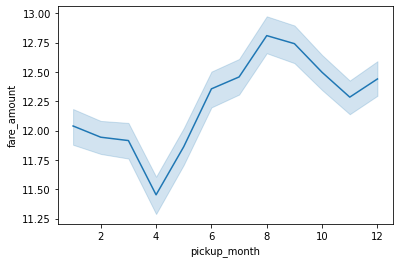

In [113]:
# sns.lineplot(x='pickup_month',y='trip_duration',data=df)
sns.lineplot(x='pickup_month',y='fare_amount',data=df)

- From February, we can see trip duration rising every month.

- The distribution for both vendors is very similar.

- We see for longer distances the trip is not stored.

- We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides

- Distances are longer on Sundays probably because it’s weekend.
- Monday trip distances are also quite high.
- This probably means that there can be outstation trips on these days and/or the streets are busier.

- Distances are the longest around 5 am.

- As seen above also, distances being the longest during late night or it maybe called as early morning too.
- This can probably point to outstation trips where people start early for the day.

- As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June

- This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

- We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

- We can see even though distance is recorded as 0 but trip duration is definitely more.
    - One reason can be that the dropoff coordinates weren’t recorded.
    - Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

### Data Visualization

The next step is to get insight to data.

Remove any noisy or outlier data and understand data distribution

In [114]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia

#### distance travelled by hour by days

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


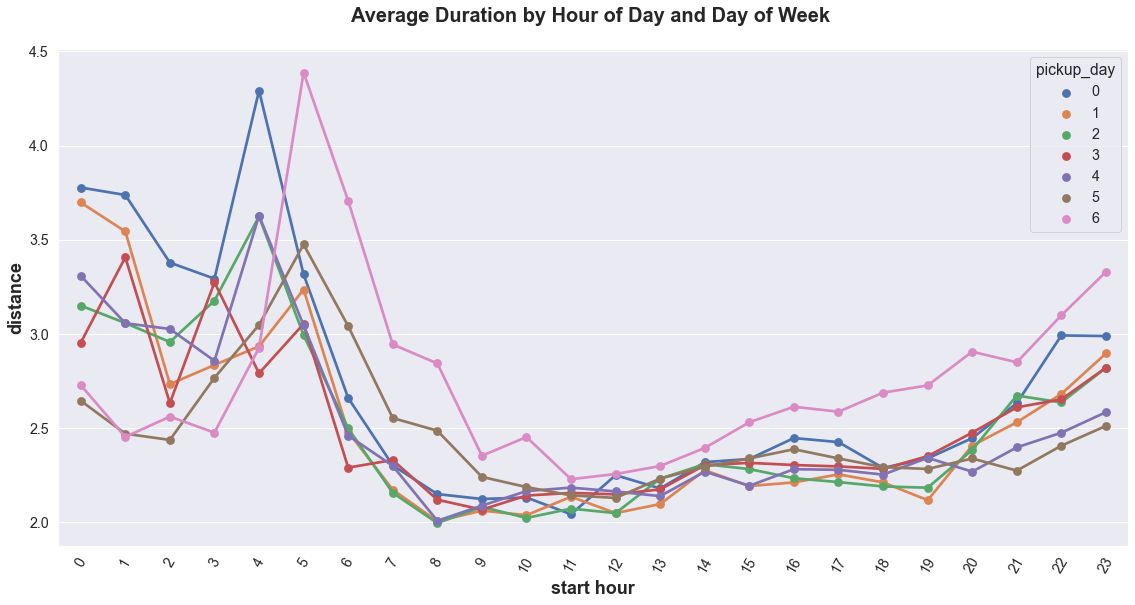

In [115]:
sns.set(font_scale=1.3)
g = sns.factorplot('pickup_hour', 
                   'haversine_distance', 
                   hue = 'pickup_day', 
                   estimator = np.mean, 
                   data = df, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title('Average Duration by Hour of Day and Day of Week \n',weight='bold', size = 20)
plt.xlabel('start hour', size = 18,weight = 'bold')
plt.ylabel('distance', size = 18,weight = 'bold')
g.set_xticklabels(rotation=60)

####  count of trip per year, per month, per weekdays, per hour

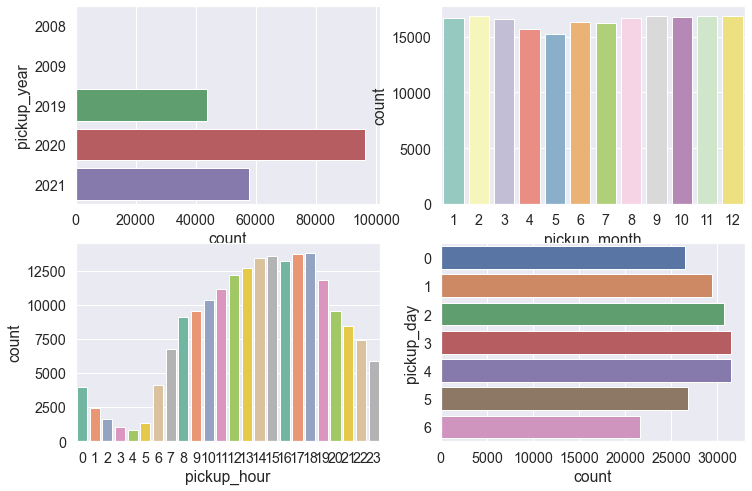

In [116]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set3')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_day', data=df)

plt.show()

####  count as per mid night trip, per rush hour trip, per passenger count, per snow season

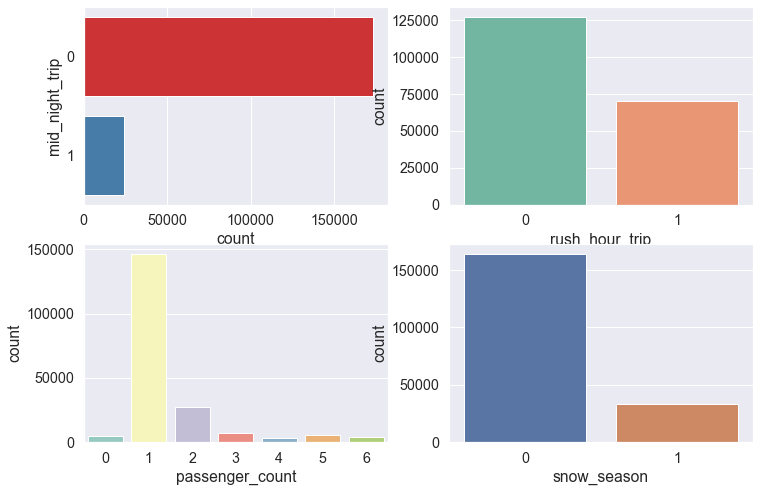

In [117]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df,palette='Set3')

plt.subplot(2,2,4)
sns.countplot(x='snow_season', data=df)

plt.show()

####  count as per pick weekday and as per airport trip

<AxesSubplot:xlabel='isAirportTrip', ylabel='count'>

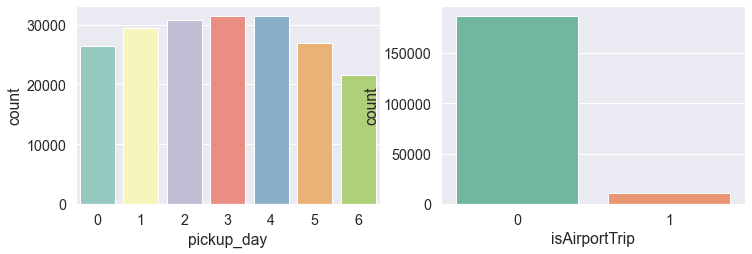

In [118]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='pickup_day',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.countplot(x='isAirportTrip',data=df,palette='Set2')

####  Pickup Location Count Plot as per region

<AxesSubplot:xlabel='pickup_laGuardia', ylabel='count'>

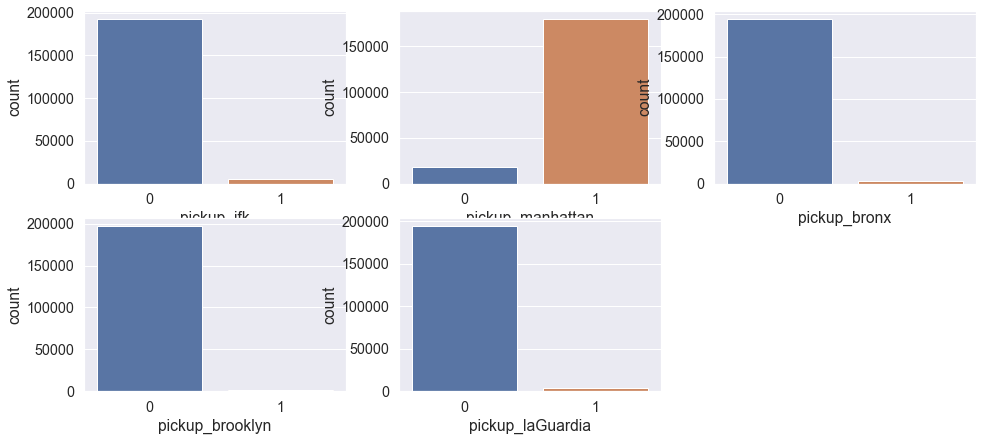

In [119]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
# plt.show()

####  Drop Location Count Plot as per region

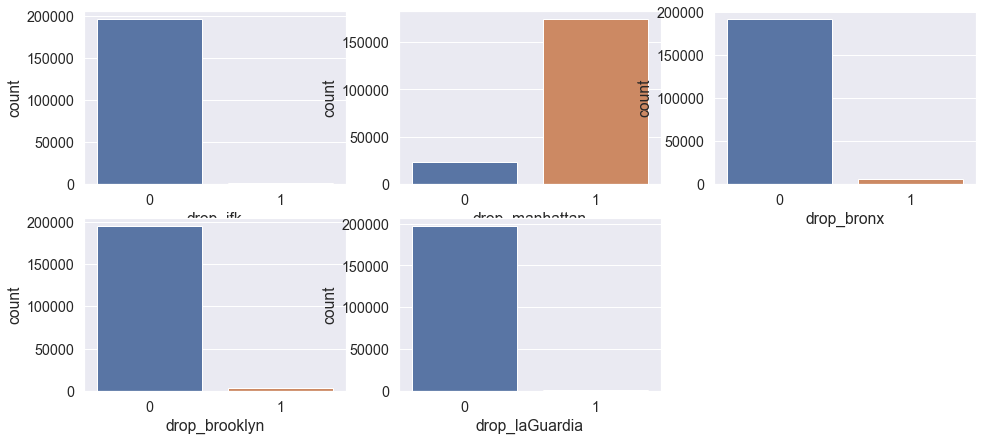

In [120]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

####  Fare amount vs Trip distance

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array w

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

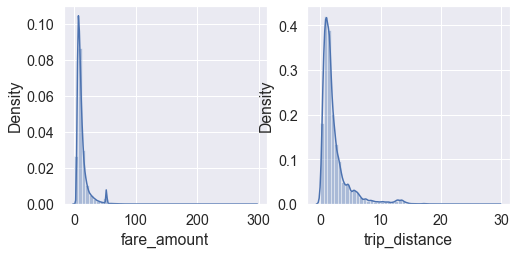

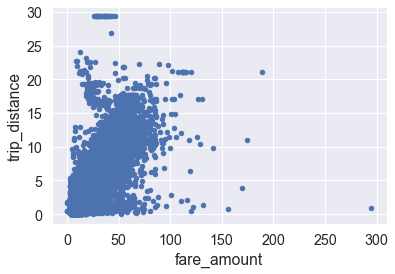

In [121]:
plt.figure(figsize=(8,8))

# fare amount density
plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

# trip distance density 
plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

# fare amount vs trip distance
df.plot(x='fare_amount',y='trip_distance',kind='scatter')

####  cancel ride desnity

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

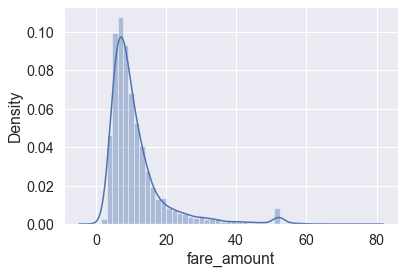

In [122]:
cancel_ride=df[(df['fare_amount']>=0) & (df['passenger_count']==0)]
sns.distplot(cancel_ride['fare_amount'],kde=True)

####  log of fare amount vs density 

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

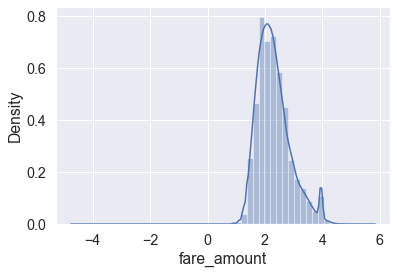

In [123]:
sns.distplot(np.log(df['fare_amount']),kde=True)

####  Airport vs Non Aiport Trip Fare Distributinon

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


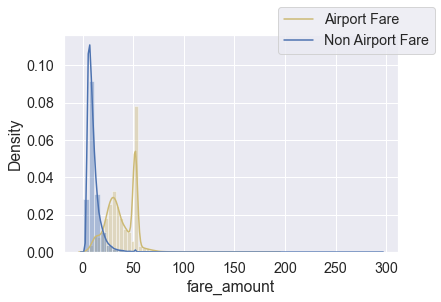

In [124]:
df_airport=df[df['isAirportTrip']==1]
df_non_airport=df[df['isAirportTrip']==0]

fig = plt.figure(figsize=(6,4))
sns.distplot(df_airport['fare_amount'],kde=True,color="y")
sns.distplot(df_non_airport['fare_amount'],kde=True)
fig.legend(labels=['Airport Fare','Non Airport Fare'])
plt.show()

####  Different Area Fare Distribution

In [125]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

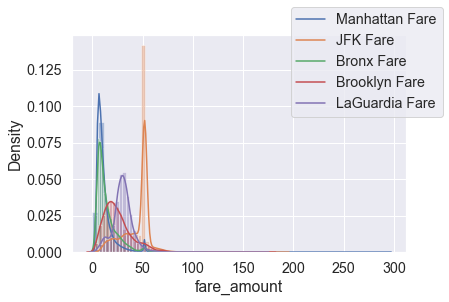

In [126]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df_manhattan['fare_amount'],kde=True)
sns.distplot(df_jfk['fare_amount'],kde=True)
sns.distplot(df_bronx['fare_amount'],kde=True)
sns.distplot(df_brooklyn['fare_amount'],kde=True)
sns.distplot(df_LGD['fare_amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

####  Fare Distribution of Manhattan

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

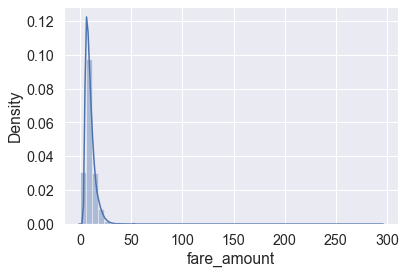

In [127]:
df_man=df[ (df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1)]
sns.distplot(df_man['fare_amount'],kde=True)

In [128]:
df_man['fare_amount'].sum()/df_man.shape[0]
df=df[~((df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1) & (df['fare_amount'] > 20))]

####  Fare Distribution at Different Time Zone

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

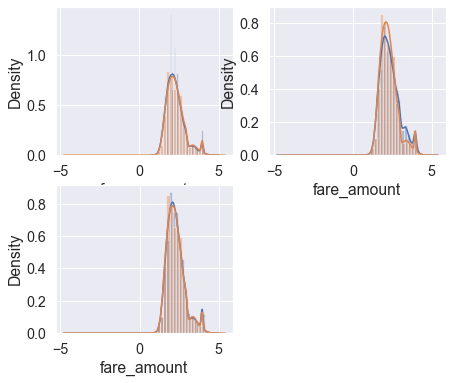

In [129]:
df_snow=df[df['snow_season']==1]
df_non_snow=df[df['snow_season']==0]

fig = plt.figure(figsize=(7,6))
ax=plt.subplot(2,2,1)
sns.distplot(np.log(df_snow['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_snow['fare_amount']),ax=ax)


df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_mid['fare_amount']),ax=ax)

df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_rush_hour['fare_amount']),ax=ax)

### Correlation

- corr() is used for correlation

In [130]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,pickup_jfk,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia,isAirportTrip
VendorID,1.000000,0.191301,0.003501,0.007914,-0.003454,0.006420,-0.026870,0.008375,-0.865418,0.014603,...,0.017253,-0.001015,-0.009088,0.004682,0.009791,0.003214,0.002843,-9.554588e-03,0.003524,0.016192
passenger_count,0.191301,1.000000,0.007816,0.002736,-0.001176,0.000697,0.003428,0.014162,-0.160845,-0.003266,...,0.010525,-0.002196,-0.007458,0.002330,0.003026,0.010257,-0.001031,-5.833323e-03,0.005308,0.013356
trip_distance,0.003501,0.007816,1.000000,0.179179,-0.063127,-0.082485,0.002634,0.875719,-0.011026,-0.106544,...,0.561871,0.029657,0.042492,0.211323,-0.520791,0.289887,0.162814,1.265757e-01,0.124759,0.639179
RatecodeID,0.007914,0.002736,0.179179,1.000000,-0.013934,-0.019427,-0.002197,0.198311,0.002217,-0.188674,...,0.150255,-0.000497,-0.001557,-0.001744,-0.046926,0.122345,-0.005253,-2.275092e-03,0.001932,0.140942
PULocationID,-0.003454,-0.001176,-0.063127,-0.013934,1.000000,0.033962,-0.042592,-0.087681,0.033623,0.003690,...,-0.073335,-0.084923,-0.154312,-0.060611,0.064335,-0.008077,-0.038782,-1.340976e-02,0.004159,-0.086038
DOLocationID,0.006420,0.000697,-0.082485,-0.019427,0.033962,1.000000,-0.052661,-0.114904,0.028123,0.056946,...,-0.050164,-0.038116,-0.028863,-0.026530,0.170469,-0.019942,-0.122911,-1.457666e-01,-0.029275,-0.065552
payment_type,-0.026870,0.003428,0.002634,-0.002197,-0.042592,-0.052661,1.000000,-0.003391,-0.007957,0.003276,...,0.046418,0.017091,0.044008,0.004301,-0.078576,-0.000209,-0.006862,5.935167e-02,-0.010976,0.027308
fare_amount,0.008375,0.014162,0.875719,0.198311,-0.087681,-0.114904,-0.003391,1.000000,-0.016602,-0.190354,...,0.541204,0.033367,0.009376,0.263250,-0.461713,0.274207,0.195931,6.443514e-02,0.167642,0.668280
extra,-0.865418,-0.160845,-0.011026,0.002217,0.033623,0.028123,-0.007957,-0.016602,1.000000,0.014632,...,-0.019308,-0.031826,-0.040950,-0.033805,0.064233,0.010589,-0.018039,-3.446735e-02,-0.014747,-0.032229
mta_tax,0.014603,-0.003266,-0.106544,-0.188674,0.003690,0.056946,0.003276,-0.190354,0.014632,1.000000,...,-0.017434,0.001701,0.002520,-0.009070,0.083015,-0.004498,0.003673,1.805059e-04,-0.004497,-0.019351


- heatmap to look for variable dependencies

<AxesSubplot:>

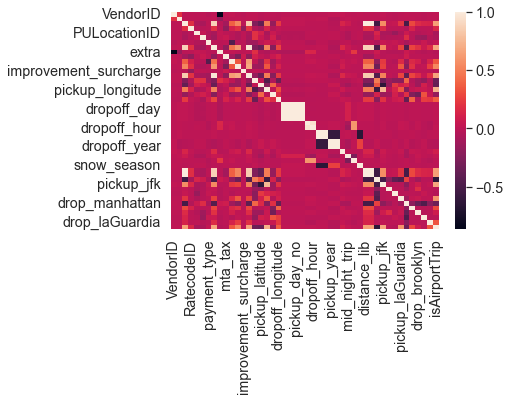

In [131]:
sns.heatmap(df.corr())

- shows all columns

In [132]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia

- show number of records and number of columns 

In [133]:
df.shape

(191796, 55)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191796 entries, 0 to 197957
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               191796 non-null  float64
 1   pickup_datetime        191796 non-null  object 
 2   dropoff_datetime       191796 non-null  object 
 3   passenger_count        191796 non-null  int64  
 4   trip_distance          191796 non-null  float64
 5   RatecodeID             191796 non-null  float64
 6   store_and_fwd_flag     191796 non-null  object 
 7   PULocationID           191796 non-null  int64  
 8   DOLocationID           191796 non-null  int64  
 9   payment_type           191796 non-null  float64
 10  fare_amount            191796 non-null  float64
 11  extra                  191796 non-null  float64
 12  mta_tax                191796 non-null  float64
 13  tip_amount             191796 non-null  float64
 14  tolls_amount           191796 non-nu

### PCA

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Profit is the dependent column
y = df['total_amount']

# start with nothing
x_names = []

# the previous r2
previous_r2 = -1

# list of all columns
columns = ['VendorID', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip']

# choose one col at a time and check its significance
for col in columns:
    
    # this will hold all the variables need to pass to the model
    temp_variables = []
    
    # add previously selected variable(s)
    temp_variables.extend(x_names)
    
    # add the current column
    temp_variables.append(col)
    
    print(f"selected columns {temp_variables}")
    
    # get all the variables in the form of a df
    x = df[temp_variables]
    
    # create model 
    model = LinearRegression()
    
    # train the model
    model.fit(x, y)
    
    # predict the values
    predictions = model.predict(x)
    
    # evaluate the model
    r2 = r2_score(y, predictions)

    print(f"previous r2 = {previous_r2}, current r2 = {r2}")
    
    # check if this is the first variable
    if previous_r2 == -1:
        previous_r2 = r2
        x_names.append(col)
        print(rf"since this is the first column, add ({col}) it to the list")
    else:
        # check if this r2 is greater than the previous one
        # if r2 > previous_r2:
        
        # check if the r2 difference is significant
        print(f"r2 - previous_r2 = {r2 - previous_r2}")
        if (r2 - previous_r2) >= 0.03:
            previous_r2 = r2
            x_names.append(col)
            print(f"found col: {col} increasing the r2 score")
        
        
print(f"finally selected columns = {x_names}")

selected columns ['VendorID']
previous r2 = -1, current r2 = 0.0002498431119577482
since this is the first column, add (VendorID) it to the list
selected columns ['VendorID', 'passenger_count']
previous r2 = 0.0002498431119577482, current r2 = 0.00041206910261293306
r2 - previous_r2 = 0.00016222599065518484
selected columns ['VendorID', 'trip_distance']
previous r2 = 0.0002498431119577482, current r2 = 0.7132309116099458
r2 - previous_r2 = 0.712981068497988
found col: trip_distance increasing the r2 score
selected columns ['VendorID', 'trip_distance', 'RatecodeID']
previous r2 = 0.7132309116099458, current r2 = 0.7161298789791581
r2 - previous_r2 = 0.0028989673692123574
selected columns ['VendorID', 'trip_distance', 'PULocationID']
previous r2 = 0.7132309116099458, current r2 = 0.713477265893633
r2 - previous_r2 = 0.00024635428368724455
selected columns ['VendorID', 'trip_distance', 'DOLocationID']
previous r2 = 0.7132309116099458, current r2 = 0.71374015807763
r2 - previous_r2 = 0.000

previous r2 = 0.9865984487138898, current r2 = 0.9867186217767548
r2 - previous_r2 = 0.0001201730628650477
selected columns ['VendorID', 'trip_distance', 'fare_amount', 'tip_amount', 'drop_laGuardia']
previous r2 = 0.9865984487138898, current r2 = 0.9868127586895382
r2 - previous_r2 = 0.00021430997564841903
selected columns ['VendorID', 'trip_distance', 'fare_amount', 'tip_amount', 'isAirportTrip']
previous r2 = 0.9865984487138898, current r2 = 0.986678770691026
r2 - previous_r2 = 8.032197713625511e-05
finally selected columns = ['VendorID', 'trip_distance', 'fare_amount', 'tip_amount']


In [136]:
## finally selected columns = ['VendorID', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'tip_amount'] --- 0.01

### Separate the independent and dependent relationship

- independent variables

In [137]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia

In [138]:
x = df.drop(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance',
       'pickup_manhattan', 'pickup_jfk', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_laGuardia', 'drop_manhattan', 'drop_jfk', 'drop_brooklyn',
       'drop_bronx', 'drop_laGuardia', 'isAirportTrip'], axis=1).values

In [139]:
x

array([[2.        , 3.15253947],
       [1.        , 1.56358305],
       [2.        , 1.56991994],
       ...,
       [2.        , 0.6724327 ],
       [1.        , 0.91073122],
       [2.        , 1.34265328]])

- dependent variable

In [140]:
y1 = df['total_amount']

In [141]:
y1

0         20.80
2         10.80
4         15.99
5         23.16
6          9.96
          ...  
197953    36.30
197954    17.16
197955    19.24
197956    11.30
197957    11.76
Name: total_amount, Length: 191796, dtype: float64

In [142]:
y2 = df['fare_amount']

In [143]:
y2

0         17.5
2          6.5
4          8.0
5         15.0
6          4.5
          ... 
197953    31.0
197954    11.0
197955    10.5
197956     8.0
197957     5.5
Name: fare_amount, Length: 191796, dtype: float64

In [144]:
y3 = df['tip_amount']

In [145]:
y3

0         0.00
2         1.00
4         3.69
5         3.86
6         1.66
          ... 
197953    4.00
197954    2.86
197955    4.44
197956    0.00
197957    1.96
Name: tip_amount, Length: 191796, dtype: float64

## LINEAR REGRESSION

#### Split the data into train and tests sets

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test1 = train_test_split(x,y1,train_size=0.8,test_size=0.2,random_state=864)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test2 = train_test_split(x,y2,train_size=0.8,test_size=0.2,random_state=864)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train3,y_test3 = train_test_split(x,y3,train_size=0.8,test_size=0.2,random_state=864)

### Import linear regression algorithm from scikit

In [147]:
from sklearn.linear_model import LinearRegression
# creating model using LinearRegression algorithm
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

### Creating Model

In [148]:
# creating model 
model1.fit(x_train,y_train1)
model2.fit(x_train,y_train2)
model3.fit(x_train,y_train3)

LinearRegression()

### Testing the model

In [149]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model1.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test1,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test1,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test1,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test1,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model2.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test2,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test2,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test2,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test2,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model3.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test3,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test3,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test3,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test3,predictions))}")

r2_score : 0.7210752397406341
mean absolute error : 3.972646093680392
mean squared error : 39.56841656076351
root mean squared error : 6.290343119477944
r2_score : 0.7711499978271212
mean absolute error : 2.9472588525885244
mean squared error : 21.179775590815233
root mean squared error : 4.602149018753655
r2_score : 0.17418887340134825
mean absolute error : 1.4829333450406292
mean squared error : 4.992101176677249
root mean squared error : 2.2343010488018953


In [150]:
# import pickle

# # create the file to store the model
# # w: write
# # b: binary data
# file = open('taxi_fare_linear.pkl', 'wb')

# # store the model using pickle
# pickle.dump(model, file)

# # save the file
# file.close()

## XG Boost

#### SPlitting the dataset into training and testing sets

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test1 = train_test_split(x,y1,train_size=0.8,test_size=0.2,random_state=563)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test2 = train_test_split(x,y2,train_size=0.8,test_size=0.2,random_state=563)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train3,y_test3 = train_test_split(x,y3,train_size=0.8,test_size=0.2,random_state=563)

#### Importing XGBoost algorithm from scikit

In [152]:
from xgboost import XGBRegressor
# creating model using LinearRegression algorithm
model_21 = XGBRegressor()
model_22 = XGBRegressor()
model_23 = XGBRegressor()

In [153]:
# model_2.get_params()

In [156]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ], #so called `eta` value
#               'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
#               'gamma' : [0.0, 0.1, 0.2 , 0.3, 0.4],
#               'eta':[.03], 
#               'eval_metric':['rmse'],
#               'min_child_weight': [1, 3, 5, 7],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.3, 0.4, 0.5 , 0.7],
#               'n_estimators': [786]}

# paramters = {
#      "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#      "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12],
#      "min_child_weight" : [ 1, 3, 5, 7 ],
#      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }

In [157]:
# from sklearn.model_selection import GridSearchCV

In [158]:
# xgb_grid = GridSearchCV(model_2,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

#### Creating the model

In [159]:
# creating model 
model_21.fit(x_train,y_train1)

# creating model 
model_22.fit(x_train,y_train2)

# creating model 
model_23.fit(x_train,y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [160]:
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

#### Testing the model

In [161]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_21.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test1,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test1,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test1,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test1,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_22.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test2,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test2,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test2,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test2,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_23.predict(x_test)

# r2_score
print(f"r2_score : {r2_score(y_test3,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test3,predictions)}")
print(f"mean squared error : {mean_squared_error(y_test3,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test3,predictions))}")

r2_score : 0.8283182278405733
mean absolute error : 2.9180346163907815
mean squared error : 24.13728313079364
root mean squared error : 4.912970906772565
r2_score : 0.8674725551943235
mean absolute error : 2.104641101743183
mean squared error : 12.224110705026305
root mean squared error : 3.4962995731238915
r2_score : 0.16897667070532374
mean absolute error : 1.4089756962690694
mean squared error : 5.663573436176024
root mean squared error : 2.3798263458025724


In [162]:
# import pickle

# # create the file to store the model
# # w: write
# # b: binary data
# file = open('taxi_fare_XG.pkl', 'wb')

# # store the model using pickle
# pickle.dump(model_2, file)

# # save the file
# file.close()

## RANDOM FOREST

#### Splitting the dataset into training and testing sets

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test1 = train_test_split(x,y1,train_size=0.8,test_size=0.2,random_state=563)
# 563

from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test2 = train_test_split(x,y2,train_size=0.8,test_size=0.2,random_state=563)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train3,y_test3 = train_test_split(x,y3,train_size=0.8,test_size=0.2,random_state=563)

#### Importing random forest algorithm from scikit

In [164]:
from sklearn.ensemble import RandomForestRegressor
# creating model using Random Forest algorithm
model_31 = RandomForestRegressor()

model_32 = RandomForestRegressor()

model_33 = RandomForestRegressor()

In [165]:
# model_3.get_params()

In [166]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

In [167]:
# param_grid = { 
#     'n_estimators': [300, 500, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
# }

In [168]:
# from sklearn.model_selection import GridSearchCV

In [169]:
# rf_grid = GridSearchCV(model_3,
#                         param_grid,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

#### creating the model

In [170]:
# creating model 
model_31.fit(x_train,y_train1)

# creating model 
model_32.fit(x_train,y_train2)

# creating model 
model_33.fit(x_train,y_train3)

RandomForestRegressor()

### Testing the model

In [171]:
# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_31.predict(x_test)

# r2_score
print(f"r2_score            : {r2_score(y_test1,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test1,predictions)}")
print(f"mean squared error  : {mean_squared_error(y_test1,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test1,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_32.predict(x_test)

# r2_score
print(f"r2_score            : {r2_score(y_test2,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test2,predictions)}")
print(f"mean squared error  : {mean_squared_error(y_test2,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test2,predictions))}")

# importing libraries from sklearn
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# storing predicted values in predictions
predictions=model_33.predict(x_test)

# r2_score
print(f"r2_score            : {r2_score(y_test3,predictions)}")
print(f"mean absolute error : {mean_absolute_error(y_test3,predictions)}")
print(f"mean squared error  : {mean_squared_error(y_test3,predictions)}")
print(f"root mean squared error : {np.sqrt(mean_squared_error(y_test3,predictions))}")

r2_score            : 0.8365224977177286
mean absolute error : 2.6791446537323855
mean squared error  : 22.98381889044059
root mean squared error : 4.7941442292071885
r2_score            : 0.8788002998969934
mean absolute error : 1.907644300240192
mean squared error  : 11.179258406796679
root mean squared error : 3.3435398018861204
r2_score            : -0.05171188557608697
mean absolute error : 1.3915592477754666
mean squared error  : 7.167605634747711
root mean squared error : 2.677238434422252


In [172]:
value=np.array([2.        , 1.02282796 ])

In [173]:
value1=np.array([1.        , 1.02282796 ])
value1

array([1.        , 1.02282796])

In [174]:
value

array([2.        , 1.02282796])

In [175]:
model_31.predict([value])


array([11.72355314])

In [176]:
model_31.predict([value1])

array([11.51785015])

In [177]:
model_32.predict([value])

array([6.63556589])

In [178]:
model_33.predict([value])

array([1.5277265])

In [179]:
import pickle

# create the file to store the model
# w: write
# b: binary data
file1 = open('taxi_fare_RANDOM1.pkl', 'wb')

# store the model using pickle
pickle.dump(model_31, file1)

# save the file
file1.close()

# create the file to store the model
# w: write
# b: binary data
file2 = open('taxi_fare_RANDOM2.pkl', 'wb')

# store the model using pickle
pickle.dump(model_32, file2)

# save the file
file2.close()

# create the file to store the model
# w: write
# b: binary data
file3 = open('taxi_fare_RANDOM3.pkl', 'wb')

# store the model using pickle
pickle.dump(model_33, file3)

# save the file
file3.close()

In [180]:
y1

0         20.80
2         10.80
4         15.99
5         23.16
6          9.96
          ...  
197953    36.30
197954    17.16
197955    19.24
197956    11.30
197957    11.76
Name: total_amount, Length: 191796, dtype: float64

In [181]:
y2

0         17.5
2          6.5
4          8.0
5         15.0
6          4.5
          ... 
197953    31.0
197954    11.0
197955    10.5
197956     8.0
197957     5.5
Name: fare_amount, Length: 191796, dtype: float64

In [182]:
y3

0         0.00
2         1.00
4         3.69
5         3.86
6         1.66
          ... 
197953    4.00
197954    2.86
197955    4.44
197956    0.00
197957    1.96
Name: tip_amount, Length: 191796, dtype: float64